# Performance of Batting Order Selection Strategies
Since there are such a vast number of possible batting order permutations, it is not feasible to test all of them. Instead, we will test a few strategies for exploring the space of permutations.

In [17]:
import numpy as np
from matplotlib import pyplot as plt

from src.data.data_loading import load_blosc2
from src.policy.batting_order_optimization import Random, OneByOne, GreedyHillClimbing, StochasticHillClimbing, \
    ShortTermHillClimbing, GeneticAlgorithm, rules

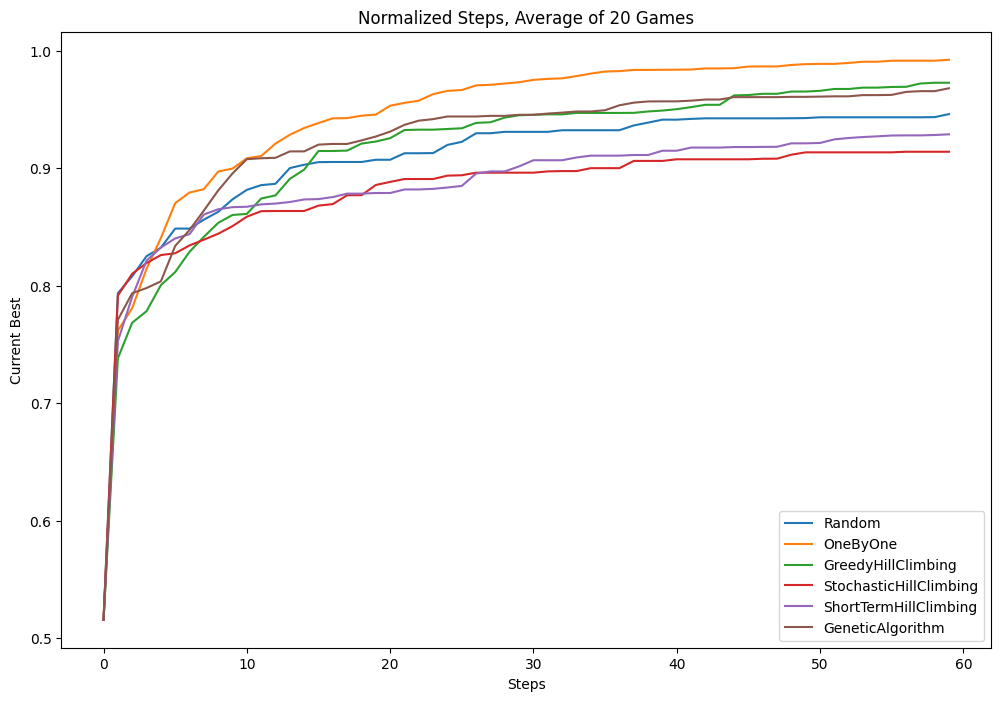

In [20]:
strategies = [Random, OneByOne, GreedyHillClimbing, StochasticHillClimbing, ShortTermHillClimbing, GeneticAlgorithm]

curves = {}

num_steps = 60
games = range(20, 40)
for game in games:
    values = []
    steps = {}
    starting_value = load_blosc2(f'random/{game}.blosc2').get_tries()[tuple(range(rules.num_batters))]
    for strategy in strategies:
        strat = load_blosc2(f'{strategy.__name__.lower()}/{game}.blosc2')
        values += list(strat.get_tries().values())
        step_arr = np.asarray([x[1] for x in strat.get_steps()])
        if len(step_arr) < num_steps:
            step_arr = np.pad(step_arr, (0, num_steps - len(step_arr)), 'constant', constant_values=step_arr[-1])
        step_arr.put(0, starting_value)
        steps[strategy] = step_arr
        
    minimum = min(values)
    maximum = max(values)
    for strategy in strategies:
        normalized = (steps[strategy] - minimum) / (maximum - minimum) / len(games)
        if strategy not in curves:
            curves[strategy] = normalized
        else:
            curves[strategy] += normalized

plt.figure(figsize=(12, 8))
for strategy in strategies:
    plt.plot(curves[strategy], label=strategy.__name__)

plt.xlabel('Steps')
plt.ylabel('Current Best')
plt.title('Normalized Steps, Average of 20 Games')
plt.legend()
plt.show()